In [1]:
%cd ../..

c:\Boyko Boev\Stock-Market-Prediction\src


In [2]:
from lstm_normalize import prepare_data, add_indicators, normalize_data, prepare_sequences, prepare_tensors, split_train_and_test_data, get_lstm_data
from utils.chart import config_chart
from constants import SP500_TICKER

---

## For **prepare_data** function

In [3]:
data = prepare_data(SP500_TICKER)
data

,Close,Direction,Change
Date,,,
2000-01-03,1455.219971,0,-14.030029
2000-01-04,1399.420044,0,-55.799927
2000-01-05,1402.109985,1,2.689941
2000-01-06,1403.449951,1,1.339966
2000-01-07,1441.469971,1,38.020020
...,...,...,...
2024-01-25,4894.160156,1,7.500000
2024-01-26,4890.970215,1,2.060059
2024-01-29,4927.930176,1,34.979980


In [4]:
data.dtypes

Close        float64
Direction      int32
Change       float64
dtype: object

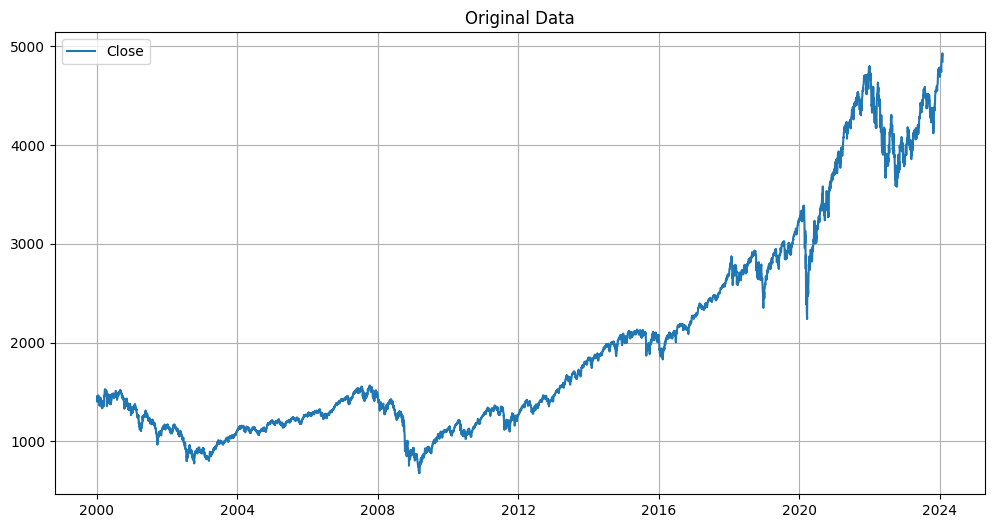

In [5]:
plt = config_chart('Original Data')
plt.plot(data['Close'])
plt.legend(['Close'])

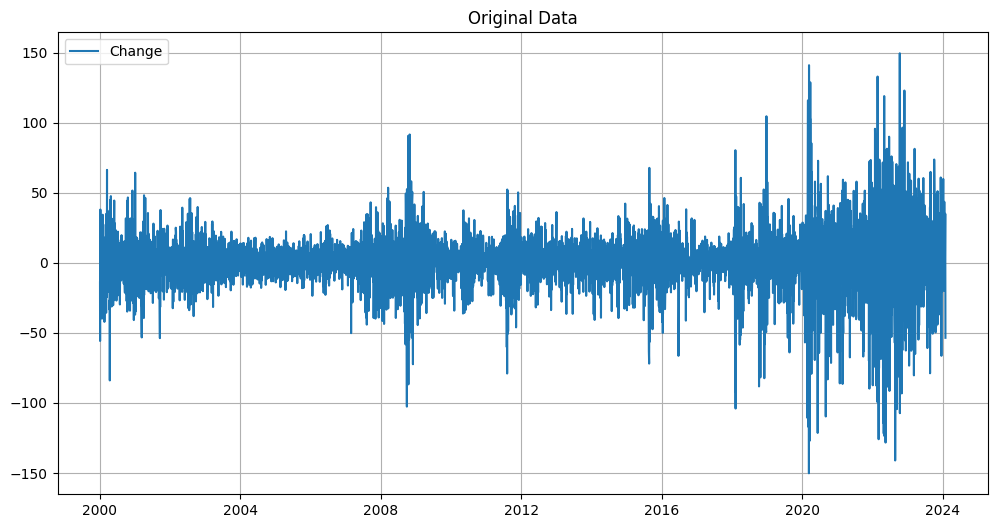

In [6]:
plt = config_chart('Original Data')
plt.plot(data['Change'])
plt.legend(['Change'])

---

## For **add_indicators** function

In [7]:
# extended_data = add_indicators(data)
# extended_data

In [8]:
# plt = config_chart('RSI Indicator')
# plt.plot(extended_data['RSI'])
# plt.legend(['RSI'])

In [9]:
# plt = config_chart('Simple Moving Average')
# plt.plot(extended_data['SMA'])
# plt.legend(['SMA'])

---

## For **normalize_data** function

In [10]:
normalized_data = normalize_data(data)
normalized_data

,Close,Direction,Change
Date,,,
2000-01-03,0.183161,0.0,0.454331
2000-01-04,0.170036,0.0,0.314986
2000-01-05,0.170668,1.0,0.510109
2000-01-06,0.170984,1.0,0.505605
2000-01-07,0.179927,1.0,0.627970
...,...,...,...
2024-01-25,0.992057,1.0,0.526155
2024-01-26,0.991306,1.0,0.508007
2024-01-29,1.000000,1.0,0.617828


In [11]:
# plt = config_chart('Normalized Data')
# plt.plot(normalized_data)
# plt.legend(['Open', 'High', 'Low', 'Close'])

----

## For **prepare_sequences** function

In [12]:
x, y, x_dates, y_dates = prepare_sequences(normalized_data)

In [13]:
x.shape, y.shape, x_dates.shape, y_dates.shape

((6037, 15, 3), (6037, 5, 3), (6037, 15), (6037, 5))

In [14]:
y

array([[[0.17113419, 0.48131888, 0.        ],
        [0.16983347, 0.48268716, 0.        ],
        [0.16080114, 0.37303238, 0.        ],
        [0.16886906, 0.61555957, 1.        ],
        [0.17235498, 0.55057472, 1.        ]],

       [[0.16983347, 0.48268716, 0.        ],
        [0.16080114, 0.37303238, 0.        ],
        [0.16886906, 0.61555957, 1.        ],
        [0.17235498, 0.55057472, 1.        ],
        [0.17231734, 0.50060107, 0.        ]],

       [[0.16080114, 0.37303238, 0.        ],
        [0.16886906, 0.61555957, 1.        ],
        [0.17235498, 0.55057472, 1.        ],
        [0.17231734, 0.50060107, 0.        ],
        [0.17604552, 0.55401049, 1.        ]],

       ...,

       [[0.98177071, 0.49116114, 0.        ],
        [0.98510371, 0.52715673, 1.        ],
        [0.98603275, 0.43438069, 0.        ],
        [0.99205673, 0.52615496, 1.        ],
        [0.9913064 , 0.5080073 , 1.        ]],

       [[0.98510371, 0.52715673, 1.        ],
        [0.98

In [15]:
y[0], y_dates[0]

(array([[0.17113419, 0.48131888, 0.        ],
        [0.16983347, 0.48268716, 0.        ],
        [0.16080114, 0.37303238, 0.        ],
        [0.16886906, 0.61555957, 1.        ],
        [0.17235498, 0.55057472, 1.        ]]),
 array(['2000-01-26T00:00:00.000000000', '2000-01-27T00:00:00.000000000',
        '2000-01-28T00:00:00.000000000', '2000-01-31T00:00:00.000000000',
        '2000-02-01T00:00:00.000000000'], dtype='datetime64[ns]'))

In [16]:
x[0], x_dates[0]

(array([[0.17003575, 0.31498627, 0.        ],
        [0.17066847, 0.51010859, 1.        ],
        [0.17098365, 0.50560507, 1.        ],
        [0.17992659, 0.6279698 , 1.        ],
        [0.18372064, 0.55494467, 1.        ],
        [0.17924213, 0.43761774, 0.        ],
        [0.1777579 , 0.48008457, 0.        ],
        [0.18185774, 0.55928164, 1.        ],
        [0.18549653, 0.55274279, 1.        ],
        [0.18314201, 0.46774153, 0.        ],
        [0.18332078, 0.50367034, 1.        ],
        [0.18089097, 0.46667378, 0.        ],
        [0.17990072, 0.4870905 , 0.        ],
        [0.17053205, 0.36826213, 0.        ],
        [0.1725314 , 0.52949096, 1.        ]]),
 array(['2000-01-04T00:00:00.000000000', '2000-01-05T00:00:00.000000000',
        '2000-01-06T00:00:00.000000000', '2000-01-07T00:00:00.000000000',
        '2000-01-10T00:00:00.000000000', '2000-01-11T00:00:00.000000000',
        '2000-01-12T00:00:00.000000000', '2000-01-13T00:00:00.000000000',
        '200

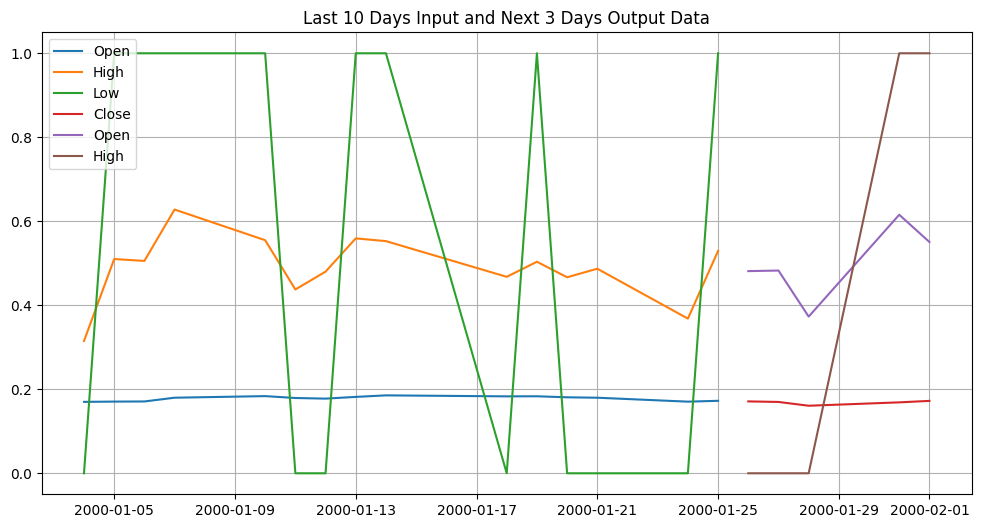

In [17]:
plt = config_chart('Last 10 Days Input and Next 3 Days Output Data')
plt.plot(x_dates[0], x[0])
plt.plot(y_dates[0], y[0])
plt.legend(['Open', 'High', 'Low', 'Close', 'Open', 'High', 'Low', 'Close'])


---

## For **split_train_and_test_data** function

In [18]:
train, test, predict = split_train_and_test_data(x, y, x_dates, y_dates)

In [19]:
train['x'].shape,  train['x_dates'].shape, train['y'].shape,  train['y_dates'].shape

((4829, 15, 3), (4829, 15), (4829, 5, 3), (4829, 5))

In [20]:
test['x'].shape, test['x_dates'].shape, test['y'].shape, test['y_dates'].shape

((604, 15, 3), (604, 15), (604, 5, 3), (604, 5))

In [21]:
predict['x'].shape, predict['x_dates'].shape, predict['y'].shape, predict['y_dates'].shape

((604, 15, 3), (604, 15), (604, 5, 3), (604, 5))

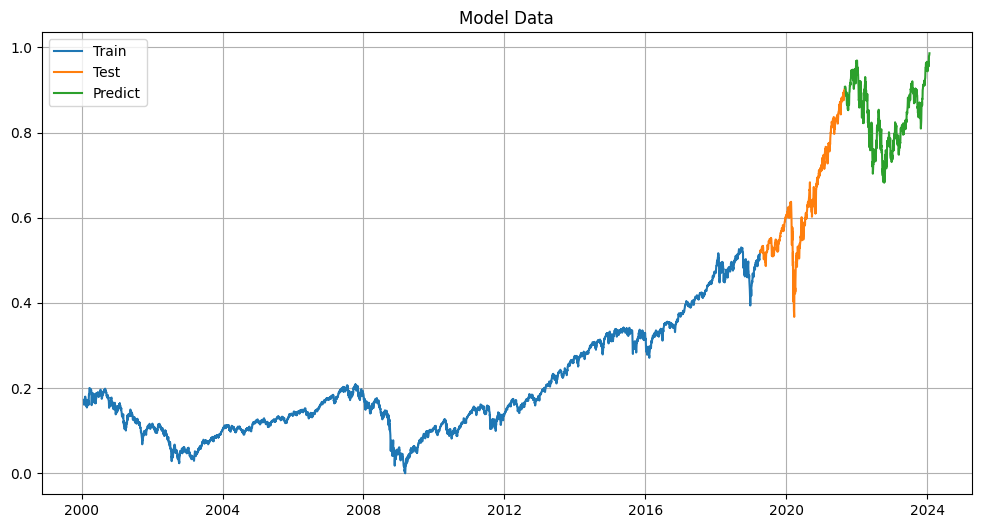

In [22]:
plt = config_chart('Model Data')
plt.plot(train['y_dates'][:, 0], train['y'][:, 0, 0])
plt.plot(test['y_dates'][:, 0], test['y'][:, 0, 0])
plt.plot(predict['y_dates'][:, 0], predict['y'][:, 0, 0])
plt.legend(['Train', 'Test', 'Predict'])

---

## For **prepare_tensors** function

In [23]:
# x_train, y_train = prepare_tensors(train['x'], train['y'])
# x_test, y_test = prepare_tensors(test['x'], test['y'])
# x_predict, y_predict = prepare_tensors(predict['x'], predict['y'])

In [24]:
# x_train.shape, y_train.shape

In [25]:
# print('x_train:', x_train.shape)
# print(x_train[0])

In [26]:
# print('y_train:', y_train.shape)
# print(y_train[0])

In [27]:
# x_test.shape, y_test.shape

In [28]:
# print('x_test:',x_test.shape)
# print(x_test[0])

In [29]:
# print('y_test:',y_test.shape)
# print(y_test[0])

---

## For **get_lstm_data** function

In [30]:
train, test, predict = get_lstm_data(SP500_TICKER)

In [31]:
print(train['x'].shape) 
print(train['x'][0])

print(train['x_dates'].shape) 
print(train['x_dates'][0])


(4829, 15, 3)
[[0.17003575 0.31498627 0.        ]
 [0.17066847 0.51010859 1.        ]
 [0.17098365 0.50560507 1.        ]
 [0.17992659 0.6279698  1.        ]
 [0.18372064 0.55494467 1.        ]
 [0.17924213 0.43761774 0.        ]
 [0.1777579  0.48008457 0.        ]
 [0.18185774 0.55928164 1.        ]
 [0.18549653 0.55274279 1.        ]
 [0.18314201 0.46774153 0.        ]
 [0.18332078 0.50367034 1.        ]
 [0.18089097 0.46667378 0.        ]
 [0.17990072 0.4870905  0.        ]
 [0.17053205 0.36826213 0.        ]
 [0.1725314  0.52949096 1.        ]]
(4829, 15)
['2000-01-04T00:00:00.000000000' '2000-01-05T00:00:00.000000000'
 '2000-01-06T00:00:00.000000000' '2000-01-07T00:00:00.000000000'
 '2000-01-10T00:00:00.000000000' '2000-01-11T00:00:00.000000000'
 '2000-01-12T00:00:00.000000000' '2000-01-13T00:00:00.000000000'
 '2000-01-14T00:00:00.000000000' '2000-01-18T00:00:00.000000000'
 '2000-01-19T00:00:00.000000000' '2000-01-20T00:00:00.000000000'
 '2000-01-21T00:00:00.000000000' '2000-01-24

In [32]:

print(train['y'].shape)
print(train['y'][0])

print(train['y_dates'].shape) 
print(train['y_dates'][0])

(4829, 5, 3)
[[0.17113419 0.48131888 0.        ]
 [0.16983347 0.48268716 0.        ]
 [0.16080114 0.37303238 0.        ]
 [0.16886906 0.61555957 1.        ]
 [0.17235498 0.55057472 1.        ]]
(4829, 5)
['2000-01-26T00:00:00.000000000' '2000-01-27T00:00:00.000000000'
 '2000-01-28T00:00:00.000000000' '2000-01-31T00:00:00.000000000'
 '2000-02-01T00:00:00.000000000']


In [33]:
print(test['x'].shape) 
print(test['x'][0])

print(test['x_dates'].shape) 
print(test['x_dates'][0])

print(test['y'].shape)
print(test['y'][0])

print(test['y_dates'].shape) 
print(test['y_dates'][0])

(604, 15, 3)
[[0.50722346 0.53559529 1.        ]
 [0.50713646 0.47381328 0.        ]
 [0.50517474 0.47741561 0.        ]
 [0.5123841  0.61842848 1.        ]
 [0.49964244 0.3549845  0.        ]
 [0.49908971 0.50897487 1.        ]
 [0.50381753 0.52048392 1.        ]
 [0.50073858 0.4532638  0.        ]
 [0.50310717 0.52128452 1.        ]
 [0.50756687 0.52158424 1.        ]
 [0.51527963 0.56305133 1.        ]
 [0.51529141 0.49779894 0.        ]
 [0.51674032 0.49216048 0.        ]
 [0.51814927 0.51914903 1.        ]
 [0.52128943 0.5297581  1.        ]]
(604, 15)
['2019-03-18T00:00:00.000000000' '2019-03-19T00:00:00.000000000'
 '2019-03-20T00:00:00.000000000' '2019-03-21T00:00:00.000000000'
 '2019-03-22T00:00:00.000000000' '2019-03-25T00:00:00.000000000'
 '2019-03-26T00:00:00.000000000' '2019-03-27T00:00:00.000000000'
 '2019-03-28T00:00:00.000000000' '2019-03-29T00:00:00.000000000'
 '2019-04-01T00:00:00.000000000' '2019-04-02T00:00:00.000000000'
 '2019-04-03T00:00:00.000000000' '2019-04-04T0

In [34]:
print(predict['x'].shape) 
print(predict['x'][0])

print(predict['x_dates'].shape) 
print(predict['x_dates'][0])

print(predict['y'].shape)
print(predict['y'][0])

print(predict['y_dates'].shape) 
print(predict['y_dates'][0])

(604, 15, 3)
[[0.88343133 0.48305407 0.        ]
 [0.88446626 0.50433737 1.        ]
 [0.88579762 0.50190216 1.        ]
 [0.89013029 0.55034097 1.        ]
 [0.89181678 0.51167723 1.        ]
 [0.89457115 0.56138333 1.        ]
 [0.88713128 0.45429734 0.        ]
 [0.87588556 0.36546    0.        ]
 [0.87718626 0.57906349 1.        ]
 [0.8856235  0.60491751 1.        ]
 [0.89452877 0.59867879 1.        ]
 [0.89610477 0.50724009 1.        ]
 [0.89844752 0.52028275 1.        ]
 [0.89228721 0.42190489 0.        ]
 [0.90154772 0.6187958  1.        ]]
(604, 15)
['2021-08-09T00:00:00.000000000' '2021-08-10T00:00:00.000000000'
 '2021-08-11T00:00:00.000000000' '2021-08-12T00:00:00.000000000'
 '2021-08-13T00:00:00.000000000' '2021-08-16T00:00:00.000000000'
 '2021-08-17T00:00:00.000000000' '2021-08-18T00:00:00.000000000'
 '2021-08-19T00:00:00.000000000' '2021-08-20T00:00:00.000000000'
 '2021-08-23T00:00:00.000000000' '2021-08-24T00:00:00.000000000'
 '2021-08-25T00:00:00.000000000' '2021-08-26T0